In [1]:
# Import necessary modules (Install if have not previously done so)
import pandas as pd
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import shapely #have to install wheel module and then specfic wheel to work
from area import area
from shapely.geometry import Polygon, Point, MultiPolygon
import shapefile

In [2]:
# Install modles if necessary
#pip install 

In [3]:
# Get data (pre-cleaned in Excel)
#Data has to be in working folder-- move desired file out of "Coordinates" folder
df = pd.read_csv (r'PolarBear104556.csv') #read the csv file (put 'r' before the path string to address any special characters in the path, such as '\'). Don't forget to put the file name at the end of the path + ".csv"
print (df) 

     ObvservationNum      Species                       Coordinates  \
0                592   Polar Bear  (49.75250235, -94.4786833962917)   
1                687   Polar Bear  (49.75250235, -94.4786833962917)   
2                497   Polar Bear  (49.75250235, -94.4786833962917)   
3                474   Polar Bear  (49.75250235, -94.4786833962917)   
4                877   Polar Bear  (49.75250235, -94.4786833962917)   
..               ...          ...                               ...   
303               57   Polar Bear    (80.6812174206, 17.3944860794)   
304               58   Polar Bear    (80.7353934482, 17.3340128937)   
305               56   Polar Bear    (80.7688622844, 16.4737744967)   
306              243   Polar Bear    (81.1836878378, 22.1235594707)   
307               23   Polar Bear    (81.4240642631, 23.5260412867)   

     Coord_Lat  Coord_long  
0    49.752502  -94.478683  
1    49.752502  -94.478683  
2    49.752502  -94.478683  
3    49.752502  -94.478683  
4 

In [4]:
# Isolate coordinates and convert to list
#Swap long for lat so long-lat instead of lat-long b/c Points in Shapely takes long first
#Code: https://stackoverflow.com/questions/31270635/converting-some-columns-from-pandas-dataframe-to-list-of-lists
list_coords = df.reset_index()[['Coord_long', 'Coord_Lat']].values.tolist()
list_coords

[[-94.4786834, 49.75250235],
 [-94.4786834, 49.75250235],
 [-94.4786834, 49.75250235],
 [-94.4786834, 49.75250235],
 [-94.4786834, 49.75250235],
 [-94.4786834, 49.75250235],
 [-94.4786834, 49.75250235],
 [-94.4786834, 49.75250235],
 [-94.4786834, 49.75250235],
 [-94.4786834, 49.75250235],
 [-94.4786834, 49.75250235],
 [-94.4786834, 49.75250235],
 [-94.4786834, 49.75250235],
 [-94.4786834, 49.75250235],
 [-94.4786834, 49.75250235],
 [-94.4786834, 49.75250235],
 [-94.4786834, 49.75250235],
 [-94.4786834, 49.75250235],
 [-94.4786834, 49.75250235],
 [-94.4786834, 49.75250235],
 [-94.4786834, 49.75250235],
 [-94.4786834, 49.75250235],
 [-94.4786834, 49.75250235],
 [-94.4786834, 49.75250235],
 [-94.4786834, 49.75250235],
 [-94.4786834, 49.75250235],
 [-94.4786834, 49.75250235],
 [-94.4786834, 49.75250235],
 [-94.4786834, 49.75250235],
 [-94.4786834, 49.75250235],
 [-94.4786834, 49.75250235],
 [-94.4786834, 49.75250235],
 [-94.4786834, 49.75250235],
 [-94.4786834, 49.75250235],
 [-94.4786834,

In [5]:
# Make coordinates into geometric points
coord_pts = [Point(coord[0], coord[1]) for coord in list_coords]

In [6]:
# Count the # of observed coordinates in shapefile
#Data has to be in working folder-- move desired file out of "ShapeFiles" folder
#Code: https://gis.stackexchange.com/questions/208546/check-if-a-point-falls-within-a-multipolygon-with-python
polygon = shapefile.Reader('data_0') #reads shapefile, can work for multiple shapefiles if desired
polygon = polygon.shapes()  
shpfilePoints = []
for shape in polygon:
    shpfilePoints = shape.points 
polygon_shape = shpfilePoints #points in shapefile
poly_shape = Polygon(polygon_shape) #makes points into a polygon

# point in polygon test
in_pts = 0
in_pts_lt = []
out_pts = 0
out_pts_lt = []
for point in coord_pts:
    if poly_shape.contains(point):
        in_pts += 1
        in_pts_lt.append(point)
    else:
        out_pts += 1
        out_pts_lt.append(point)
print(in_pts,out_pts)

177 131


In [7]:
#Convert list of "in" points from geometric shapes to coordinates
df_in_pts = pd.DataFrame(columns=['Lat', 'Long'])
for point in in_pts_lt:
    df_in_pts = df_in_pts.append({'Long':point.centroid.x, 'Lat':point.centroid.y}, ignore_index=True)
df_in_pts

,Lat,Long
0,53.821733,-61.229553
1,53.821733,-61.229553
2,53.821733,-61.229553
3,53.821733,-61.229553
4,53.821733,-61.229553
...,...,...
172,80.681217,17.394486
173,80.735393,17.334013
174,80.768862,16.473775
175,81.183688,22.123559


In [8]:
#Convert list of "out" points from geometric shapes to coordinates
df_out_pts = pd.DataFrame(columns=['Lat', 'Long'])
for point in out_pts_lt:
    df_out_pts = df_out_pts.append({'Long':point.centroid.x, 'Lat':point.centroid.y}, ignore_index=True)
df_out_pts

,Lat,Long
0,49.752502,-94.478683
1,49.752502,-94.478683
2,49.752502,-94.478683
3,49.752502,-94.478683
4,49.752502,-94.478683
...,...,...
126,76.905312,-93.502559
127,76.905312,-93.502559
128,76.905312,-93.502559
129,76.905312,-93.502559


In [9]:
# View shapefile points
polygon_shape

[(179.999, 60.11317651769778),
 (179.3456216200001, 60.43678809800008),
 (175.98217753200004, 61.86219850300006),
 (172.41057927600002, 63.13963079800004),
 (171.8587749940001, 64.89201011300008),
 (171.08003051200012, 66.97262972600004),
 (166.16456750600003, 67.35064038400003),
 (161.00973897500012, 67.57222558300003),
 (156.47716212000012, 67.60171692300008),
 (151.53948948400011, 67.47416662500007),
 (144.5743943010001, 68.38029829200008),
 (136.20600058700006, 68.96889236100003),
 (126.41059856600009, 69.05068064000005),
 (121.5480852710001, 70.11054745600006),
 (115.07208197700004, 71.14887863000007),
 (107.77282901500007, 71.93025349600003),
 (99.58805288400004, 72.40727388700003),
 (100.51308313900006, 73.52876656300003),
 (101.55936845200006, 74.60604177700003),
 (94.88817901600004, 73.34294956800005),
 (90.10943836700005, 72.13305782000003),
 (84.12352943100007, 71.07704624000007),
 (79.10662849400006, 69.91105219200006),
 (74.85696012200003, 68.64575268500005),
 (71.58766263

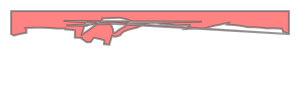

In [10]:
# View shapefile polygon
poly_shape

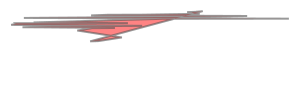

In [11]:
# View coordinates polygon
poly_coords = Polygon(list_coords)
poly_coords

In [12]:
# Convert shapefile points to polygon
#Code: https://gis.stackexchange.com/questions/92754/how-can-i-group-points-to-make-polygon-via-python

#Example:
# Coordinates as polygon
#{"type": "Polygon", 
# "coordinates": [[
#   [-102.05, 41.0], 
#   [-102.05, 37.0], 
#   [-109.05, 37.0], 
#   [-109.05, 41.0]
# ]]}

#Example:
#listPoint = [[13.415449261665342, 52.502674590782519],[13.416039347648621, 52.50250152147968],[13.415787220001221, 52.501845158120446],[13.416162729263306, 52.502201097675766],[13.415406346321104, 52.502334982450677],[13.415111303329468,52.50204435400651]]
#polygon = {'type': 'Polygon', 'coordinates': [listPoint]}
#polygon

polygon_shape = {'type': 'Polygon', 'coordinates': [polygon_shape]}
polygon_shape

{'type': 'Polygon',
 'coordinates': [[(179.999, 60.11317651769778),
   (179.3456216200001, 60.43678809800008),
   (175.98217753200004, 61.86219850300006),
   (172.41057927600002, 63.13963079800004),
   (171.8587749940001, 64.89201011300008),
   (171.08003051200012, 66.97262972600004),
   (166.16456750600003, 67.35064038400003),
   (161.00973897500012, 67.57222558300003),
   (156.47716212000012, 67.60171692300008),
   (151.53948948400011, 67.47416662500007),
   (144.5743943010001, 68.38029829200008),
   (136.20600058700006, 68.96889236100003),
   (126.41059856600009, 69.05068064000005),
   (121.5480852710001, 70.11054745600006),
   (115.07208197700004, 71.14887863000007),
   (107.77282901500007, 71.93025349600003),
   (99.58805288400004, 72.40727388700003),
   (100.51308313900006, 73.52876656300003),
   (101.55936845200006, 74.60604177700003),
   (94.88817901600004, 73.34294956800005),
   (90.10943836700005, 72.13305782000003),
   (84.12352943100007, 71.07704624000007),
   (79.106628494

In [13]:
# Convert coordinates to polygon
#Code: https://gis.stackexchange.com/questions/92754/how-can-i-group-points-to-make-polygon-via-python

#Example:
# Coordinates as polygon
#{"type": "Polygon", 
# "coordinates": [[
#   [-102.05, 41.0], 
#   [-102.05, 37.0], 
#   [-109.05, 37.0], 
#   [-109.05, 41.0]
# ]]}

#Example:
#listPoint = [[13.415449261665342, 52.502674590782519],[13.416039347648621, 52.50250152147968],[13.415787220001221, 52.501845158120446],[13.416162729263306, 52.502201097675766],[13.415406346321104, 52.502334982450677],[13.415111303329468,52.50204435400651]]
#polygon = {'type': 'Polygon', 'coordinates': [listPoint]}
#polygon

polygon_coords = {'type': 'Polygon', 'coordinates': [list_coords]}
polygon_coords

{'type': 'Polygon',
 'coordinates': [[[-94.4786834, 49.75250235],
   [-94.4786834, 49.75250235],
   [-94.4786834, 49.75250235],
   [-94.4786834, 49.75250235],
   [-94.4786834, 49.75250235],
   [-94.4786834, 49.75250235],
   [-94.4786834, 49.75250235],
   [-94.4786834, 49.75250235],
   [-94.4786834, 49.75250235],
   [-94.4786834, 49.75250235],
   [-94.4786834, 49.75250235],
   [-94.4786834, 49.75250235],
   [-94.4786834, 49.75250235],
   [-94.4786834, 49.75250235],
   [-94.4786834, 49.75250235],
   [-94.4786834, 49.75250235],
   [-94.4786834, 49.75250235],
   [-94.4786834, 49.75250235],
   [-94.4786834, 49.75250235],
   [-94.4786834, 49.75250235],
   [-94.4786834, 49.75250235],
   [-94.4786834, 49.75250235],
   [-94.4786834, 49.75250235],
   [-94.4786834, 49.75250235],
   [-94.4786834, 49.75250235],
   [-94.4786834, 49.75250235],
   [-94.4786834, 49.75250235],
   [-94.4786834, 49.75250235],
   [-94.4786834, 49.75250235],
   [-94.4786834, 49.75250235],
   [-94.4786834, 49.75250235],
   [

In [14]:
#Find area of shapefile polygon
#Code: https://stackoverflow.com/questions/4681737/how-to-calculate-the-area-of-a-polygon-on-the-earths-surface-using-python?rq=1
area_shape = area(polygon_shape)
area_shape #sq meters

19620988143372.94

In [15]:
# Find area of coordinates polygon
area_coords = area(polygon_coords) 
area_coords #sq meters

7672210901892.977

In [16]:
# Make a table of desired results
print("-------------------------------\nResults Section\n-------------------------------\nTotal # of iNaturalist Pts Inside of IUCN RedList Area: {}\nTotal # of iNaturalist Pts Outside of IUCN RedList Area: {}\nTotal Area of IUCN RedList Polygon: {}\nTotal Area of iNaturalist Coordinates Polygon: {} ".format(in_pts,out_pts,area_shape,area_coords))

-------------------------------
Results Section
-------------------------------
Total # of iNaturalist Pts Inside of IUCN RedList Area: 177
Total # of iNaturalist Pts Outside of IUCN RedList Area: 131
Total Area of IUCN RedList Polygon: 19620988143372.94
Total Area of iNaturalist Coordinates Polygon: 7672210901892.977 
